In [ ]:
!wget https://www.robots.ox.ac.uk/~vgg/data/oxbuildings/oxbuild_images.tgz
!tar -xvzf oxbuild_images.tgz


Streaming output truncated to the last 5000 lines.
all_souls_000093.jpg
all_souls_000095.jpg
all_souls_000097.jpg
all_souls_000099.jpg
all_souls_000100.jpg
all_souls_000101.jpg
all_souls_000102.jpg
all_souls_000103.jpg
all_souls_000105.jpg
all_souls_000106.jpg
all_souls_000107.jpg
all_souls_000110.jpg
all_souls_000114.jpg
all_souls_000117.jpg
all_souls_000119.jpg
all_souls_000120.jpg
all_souls_000126.jpg
all_souls_000130.jpg
all_souls_000131.jpg
all_souls_000132.jpg
all_souls_000133.jpg
all_souls_000134.jpg
all_souls_000136.jpg
all_souls_000140.jpg
all_souls_000142.jpg
all_souls_000143.jpg
all_souls_000144.jpg
all_souls_000145.jpg
all_souls_000146.jpg
all_souls_000148.jpg
all_souls_000149.jpg
all_souls_000150.jpg
all_souls_000151.jpg
all_souls_000152.jpg
all_souls_000153.jpg
all_souls_000157.jpg
all_souls_000159.jpg
all_souls_000160.jpg
all_souls_000161.jpg
all_souls_000162.jpg
all_souls_000167.jpg
all_souls_000174.jpg
all_souls_000175.jpg
all_souls_000176.jpg
all_souls_000180.jpg
all_

In [ ]:
!pip install opencv-python


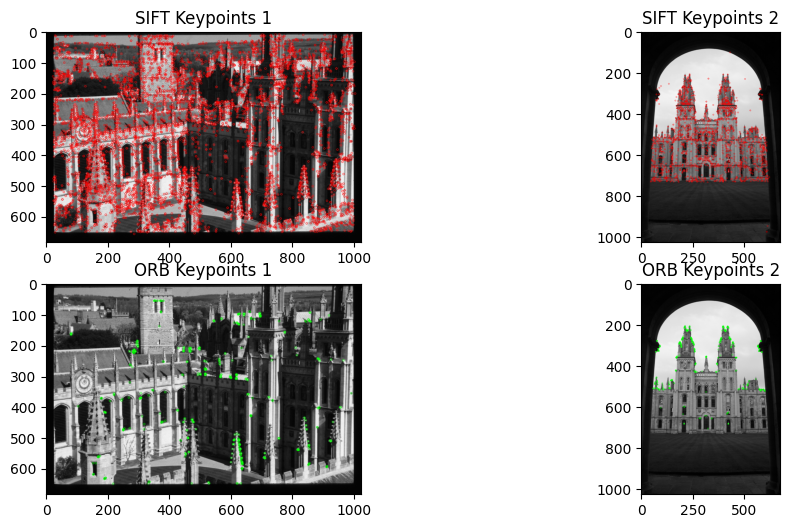

In [ ]:
import cv2
import matplotlib.pyplot as plt

# Load the images
img1 = cv2.imread('/content/all_souls_000001.jpg', cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread('/content/all_souls_000002.jpg', cv2.IMREAD_GRAYSCALE)

# Initialize SIFT detector
sift = cv2.SIFT_create()

# Detect SIFT keypoints and descriptors
keypoints_1, descriptors_1 = sift.detectAndCompute(img1, None)
keypoints_2, descriptors_2 = sift.detectAndCompute(img2, None)

# Initialize ORB detector
orb = cv2.ORB_create()

# Detect ORB keypoints and descriptors
keypoints_1_orb, descriptors_1_orb = orb.detectAndCompute(img1, None)
keypoints_2_orb, descriptors_2_orb = orb.detectAndCompute(img2, None)

# Draw keypoints
img1_sift = cv2.drawKeypoints(img1, keypoints_1, None, color=(255, 0, 0))
img2_sift = cv2.drawKeypoints(img2, keypoints_2, None, color=(255, 0, 0))
img1_orb = cv2.drawKeypoints(img1, keypoints_1_orb, None, color=(0, 255, 0))
img2_orb = cv2.drawKeypoints(img2, keypoints_2_orb, None, color=(0, 255, 0))

# Display images with keypoints
plt.figure(figsize=(12, 6))
plt.subplot(221), plt.imshow(img1_sift), plt.title('SIFT Keypoints 1')
plt.subplot(222), plt.imshow(img2_sift), plt.title('SIFT Keypoints 2')
plt.subplot(223), plt.imshow(img1_orb), plt.title('ORB Keypoints 1')
plt.subplot(224), plt.imshow(img2_orb), plt.title('ORB Keypoints 2')
plt.show()


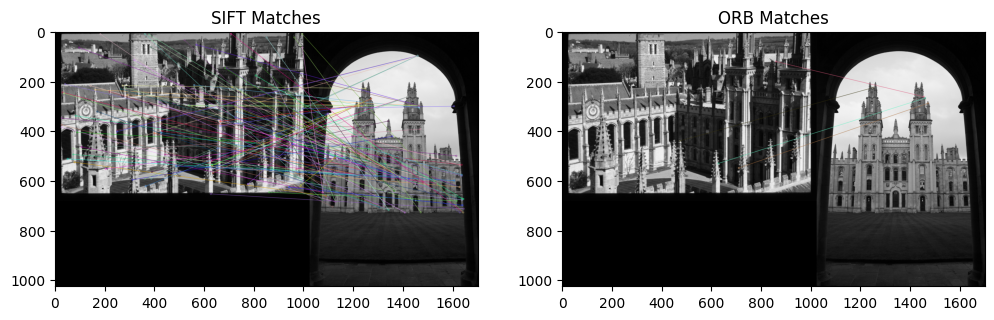

In [ ]:
# BFMatcher with default params
bf = cv2.BFMatcher()

# Match descriptors for SIFT
matches_sift = bf.knnMatch(descriptors_1, descriptors_2, k=2)

# Match descriptors for ORB
matches_orb = bf.knnMatch(descriptors_1_orb, descriptors_2_orb, k=2)

# Apply ratio test for SIFT
good_matches_sift = []
for m, n in matches_sift:
    if m.distance < 0.75 * n.distance:
        good_matches_sift.append(m)

# Apply ratio test for ORB
good_matches_orb = []
for m, n in matches_orb:
    if m.distance < 0.75 * n.distance:
        good_matches_orb.append(m)

# Draw matches
img_matches_sift = cv2.drawMatches(img1, keypoints_1, img2, keypoints_2, good_matches_sift, None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
img_matches_orb = cv2.drawMatches(img1, keypoints_1_orb, img2, keypoints_2_orb, good_matches_orb, None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

# Display matches
plt.figure(figsize=(12, 6))
plt.subplot(121), plt.imshow(img_matches_sift), plt.title('SIFT Matches')
plt.subplot(122), plt.imshow(img_matches_orb), plt.title('ORB Matches')
plt.show()


In [ ]:
import time

# Timing SIFT detection
start_time = time.time()
keypoints_1, descriptors_1 = sift.detectAndCompute(img1, None)
keypoints_2, descriptors_2 = sift.detectAndCompute(img2, None)
sift_time = time.time() - start_time

# Timing ORB detection
start_time = time.time()
keypoints_1_orb, descriptors_1_orb = orb.detectAndCompute(img1, None)
keypoints_2_orb, descriptors_2_orb = orb.detectAndCompute(img2, None)
orb_time = time.time() - start_time

# Output performance metrics
print(f'SIFT: {len(keypoints_1)} keypoints detected in {sift_time:.2f} seconds')
print(f'ORB: {len(keypoints_1_orb)} keypoints detected in {orb_time:.2f} seconds')

# Accuracy of matching can be assessed by the number of good matches
print(f'SIFT: {len(good_matches_sift)} good matches found')
print(f'ORB: {len(good_matches_orb)} good matches found')


SIFT: 6771 keypoints detected in 1.18 seconds
ORB: 500 keypoints detected in 0.03 seconds
SIFT: 114 good matches found
ORB: 4 good matches found
